# **Absenteeism**

In [83]:
import numpy as np 
import pandas as pd 

In [84]:
raw_csv_data=pd.read_csv('Absenteeism_data.csv')
raw_csv_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [85]:
raw_csv_data.shape

(700, 12)

In [86]:
raw_csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


It doesn't contain null values

In [87]:
#making the copy of raw csv data
df=raw_csv_data.copy()
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [88]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# display(df)

It is a type of a regression model whose dependent variable is binary. That is, the latter can assume one of two values – 0 or 1, True or False, Yes or No. 

Therefore, considering the values of all our features, we want to be able to predict whether the dependent variable will take the value of 0 or 1.


Apart from logistic regression, there are many other types of equations that allow you to calculate the dependent variable in a different way. 
Logistic regression is just one of them – and it is one that has been used massively.

you would most often hear professionals say that they are trying to find a regression model, or, simply, find a regression, that has a high predictive power. In other words, what they are trying to do is settle upon an equation that could be used to estimate expected values for the dependent variable with great precision.

Absenteeism Time in Hours is a dependent variable and other features are independent variables.

#### **Dropping ID**

- It will certainly harm the precision of the estimation which is used to distinguish from one another.

In [89]:
df=df.drop(['ID'],axis=1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


Reason For Absence

In [90]:
df['Reason for Absence']

0      26
1       0
2      23
3       7
4      23
5      23
6      22
7      23
8      19
9      22
10      1
11      1
12     11
13     11
14     23
15     14
16     23
17     21
18     11
19     23
20     10
21     11
22     13
23     28
24     18
25     25
26     23
27     28
28     18
29     23
30     18
31     18
32     23
33     18
34     23
35     23
36     24
37     11
38     28
39     23
40     23
41     23
42     23
43     19
44     23
45     23
46     23
47     23
48     22
49     14
50      0
51      0
52     23
53     23
54      0
55      0
56     18
57     23
58      0
59     23
60     23
61     23
62     23
63     23
64      0
65     23
66     23
67     23
68     23
69     23
70     23
71     23
72     23
73     23
74     19
75     14
76     28
77     26
78     23
79     28
80     23
81     23
82     13
83     21
84     23
85     10
86     22
87     14
88     23
89      6
90     23
91     21
92     13
93     28
94     28
95     28
96      7
97     23
98     23
99     19


In [91]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [92]:
df['Reason for Absence'].min()

0

In [93]:
df['Reason for Absence'].max()

28

In [94]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [95]:
#29 reasons to leave workspace including 0
len(df['Reason for Absence'].unique())

28

In [96]:
sorted(df['Reason for Absence'].unique())
#20th reason is missing

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

##### Different reasons for absenteeism
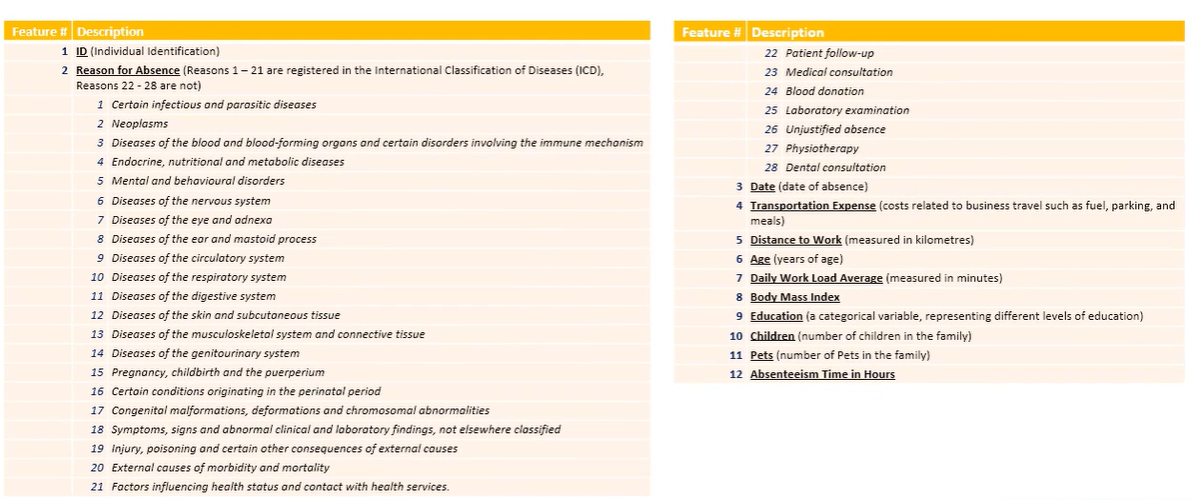

Converting categorical variables to dummy variables using .get_dummies()


In [97]:
reason_col=pd.get_dummies(df['Reason for Absence'])

In [98]:
reason_col.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Col 20 is missing

In [99]:
reason_col['check']=reason_col.sum(axis=1)
reason_col.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,check
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1


In [100]:
reason_col['check'].sum(axis=0)

700

So every employee has a reason to take a leave

In [101]:
reason_col['check'].unique()

array([1], dtype=int64)

Dropping the check col

In [102]:
reason_col=reason_col.drop(['check'],axis=1)
reason_col.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Drop the 0th column as there is no reason available to take leave

In [103]:
reason_col=pd.get_dummies(df['Reason for Absence'],drop_first=True)

In [104]:
reason_col.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


#### **Grouping the various reasons for absence**

In [105]:
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [107]:
reason_col.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

Dropping the reasons for absence col as it has multi collinearity

In [ ]:
df=df.drop(['Reason for Absence'],axis=1)

In [110]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


1-14 various disease
15-17 Pregnancy or maternity leave
19-21 Poisoning
22-28 Medical consultation

In [113]:
reason_grp1=reason_col.loc[:,1:14].max(axis=1)
reason_grp2=reason_col.loc[:,15:17].max(axis=1)
reason_grp3=reason_col.loc[:,18:21].max(axis=1)
reason_grp4=reason_col.loc[:,21:].max(axis=1)

In [114]:
reason_grp1.head()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [115]:
reason_grp2.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [116]:
reason_grp3.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [117]:
reason_grp4.head()

0     True
1    False
2     True
3    False
4     True
dtype: bool